In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

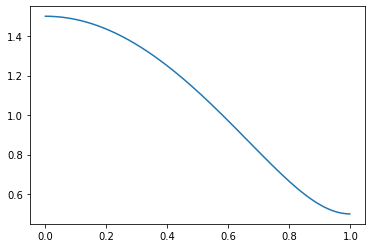

In [ ]:
a = 1
b = [1,0.5]
w,H = signal.freqz(b,a,512)
plt.plot(w/np.pi,abs(H))

In [ ]:
def idealLPF(M,wc):
  hnlpf = np.zeros(2*M+1)
  for n in range(-M,M+1):
    if n==0:
      hnlpf[n+M] = wc/np.pi
    else:
      hnlpf[n+M] = np.sin(wc*n)/(np.pi*n)
  return hnlpf

In [ ]:
def idealHPF(M,wc):
  hnhpf = np.zeros(2*M+1)
  for n in range(-M,M+1):
    if n==0:
      hnhpf[n+M] = (np.pi-wc)/np.pi
    else:
      hnhpf[n+M] = -(np.sin(wc*n)/(np.pi*n))
  return hnhpf

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

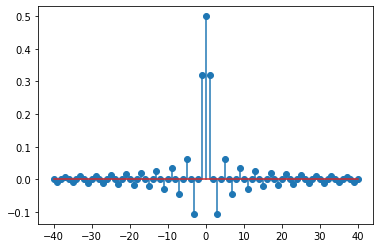

In [ ]:
M1 = 45
hd1 = idealLPF(M1,np.pi/2)
plt.stem(np.arange(-M1,M1+1),hd1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


<StemContainer object of 3 artists>

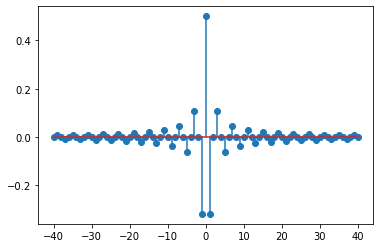

In [ ]:
M1=40
hd2 = idealHPF(M1,np.pi/2)
plt.stem(np.arange(-M1,M1+1),hd2)

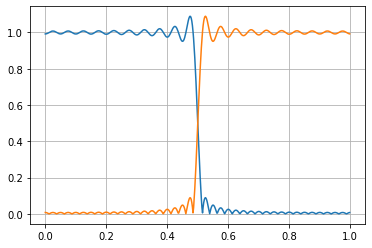

In [ ]:
w,Hd1 = signal.freqz(hd1,1,512)
plt.plot(w/np.pi,abs(Hd1))
w,Hd2 = signal.freqz(hd2,1,512)
plt.plot(w/np.pi,abs(Hd2))
plt.grid()

In [ ]:
def brlt(M=51):
  wn = np.zeros(M)
  for n in range(M):
    if n<=(M-1)/2:
      wn[n] = 2*n/(M-1)
    else:
      wn[n] = 2-2*n/(M-1)
  return wn

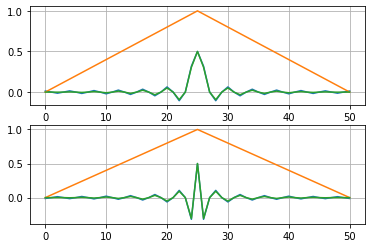

In [ ]:
M = 51
wb = brlt(M)
hdlpf = idealLPF(M=25,wc=np.pi/2)
hblpf = wb*hdlpf
hdhpf = idealHPF(M=25,wc=np.pi/2)
hbhpf = wb*hdhpf
plt.subplot(2,1,1)
plt.plot(np.arange(M),hdlpf,np.arange(M),wb,np.arange(M),hblpf)
plt.grid()
plt.subplot(2,1,2)
plt.plot(np.arange(M),hdhpf,np.arange(M),wb,np.arange(M),hbhpf)
plt.grid()

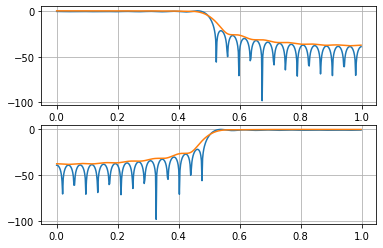

In [ ]:
w,Hd1 = signal.freqz(hdlpf,1,512)
w,Hd2 = signal.freqz(hdhpf,1,512)
Hd1db = 20*np.log10(abs(Hd1)/max(abs(Hd1)))
Hd2db = 20*np.log10(abs(Hd2)/max(abs(Hd2)))

w,Hb1 = signal.freqz(hblpf,1,512)
w,Hb2 = signal.freqz(hbhpf,1,512)
Hb1db = 20*np.log10(abs(Hb1)/max(abs(Hb1)))
Hb2db = 20*np.log10(abs(Hb2)/max(abs(Hb2)))

plt.subplot(2,1,1)
plt.plot(w/np.pi,(Hd1db))
plt.plot(w/np.pi,(Hb1db))
plt.grid()
plt.subplot(2,1,2)
plt.plot(w/np.pi,(Hd2db))
plt.plot(w/np.pi,(Hb2db))
plt.grid()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


<StemContainer object of 3 artists>

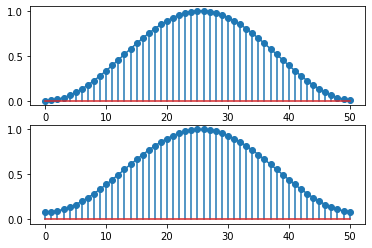

In [ ]:
whann = signal.get_window(Nx=M,window='hann')
whamm = signal.get_window(Nx=M,window='hamming')
n = np.arange(M)
plt.subplot(2,1,1)
plt.plot(n,whann)
plt.stem(n,whann)
plt.subplot(2,1,2)
plt.plot(n,whamm)
plt.stem(n,whamm)

In [ ]:
h_hann1 = hdlpf*whann
h_hamm1 = hdlpf*whamm
_,H_hann1 = signal.freqz(h_hann1,1,512)
_,H_hamm1 = signal.freqz(h_hamm1,1,512)
H_hann1db = 20*np.log10(abs(H_hann1)/max(abs(H_hann1)))
H_hamm1db = 20*np.log10(abs(H_hamm1)/max(abs(H_hamm1)))

In [ ]:
h_hann2 = hdhpf*whann
h_hamm2 = hdhpf*whamm
_,H_hann2 = signal.freqz(h_hann2,1,512)
_,H_hamm2 = signal.freqz(h_hamm2,1,512)
H_hann2db = 20*np.log10(abs(H_hann2)/max(abs(H_hann2)))
H_hamm2db = 20*np.log10(abs(H_hamm2)/max(abs(H_hamm2)))

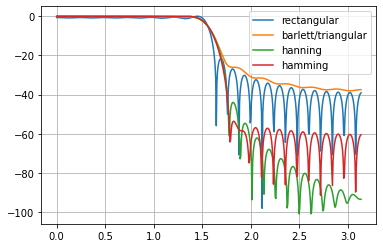

In [ ]:
plt.plot(w,Hd1db,w,Hb1db,w,H_hann1db,w,H_hamm1db)
plt.grid()
plt.legend(['rectangular','barlett/triangular','hanning','hamming'])

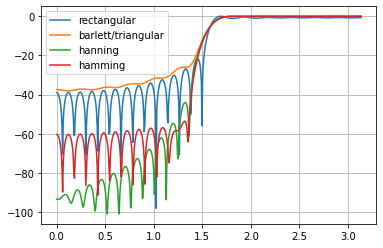

In [ ]:
plt.plot(w,Hd2db,w,Hb2db,w,H_hann2db,w,H_hamm2db)
plt.grid()
plt.legend(['rectangular','barlett/triangular','hanning','hamming'])